In [930]:
import numpy as np
import pandas as pd

In [931]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor , BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import tree

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV


In [932]:
df = pd.read_csv('re.csv')
#df = pd.read_csv('alpha.csv')
#print(df)

In [933]:
input_x = df[[ 're','aoa']]
#input_x = df[[ 'aoa']]
#print(input_x)

In [934]:
input_x = np.asarray(input_x)
print(input_x.shape)

(258, 2)


In [935]:
output_cl = df[['cl']]
output_cl = np.asarray(output_cl).reshape(-1)
print(output_cl.shape)

(258,)


In [936]:
output_cd = df[['cd']]
output_cd = np.asarray(output_cd).reshape(-1)
print(output_cd.shape)

(258,)


In [997]:
scaler = StandardScaler()
scaler.fit(input_x)
scaled_input_x = scaler.transform(input_x)

In [998]:
X_train, X_test, y_train, y_test = train_test_split(scaled_input_x, output_cl, test_size = 0.20, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(input_x, output_cl, test_size = 0.20, shuffle=True)

In [1015]:
#regr = LinearRegression()
#regr = make_pipeline(StandardScaler(), BayesianRidge(max_iter=1000, tol=1e-3, penalty='elasticnet'))
#regr = SGDRegressor()
#regr = BayesianRidge(max_iter=1000)
#regr = tree.DecisionTreeRegressor()
regr = MLPRegressor(hidden_layer_sizes=(30,15,5),max_iter = 1000000,activation = 'relu',solver = 'lbfgs', batch_size=64, learning_rate='adaptive')
 
regr.fit(X_train, y_train)

MLPRegressor(batch_size=64, hidden_layer_sizes=(30, 15, 5),
             learning_rate='adaptive', max_iter=1000000, solver='lbfgs')

In [1016]:
print(regr.score(X_test, y_test))

0.9455601762579796


In [1017]:
print(regr.score(X_train, y_train))

0.9485360937006165


In [1018]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [1019]:
y_pred = regr.predict(X_test)
print(y_pred.shape)

(52,)


In [1020]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.03383134501321747
MSE: 0.0036473785626540247
RMSE: 0.06039353080135342


In [1021]:
print(X_test[:,1].shape)
#print(X_test.shape)
print(y_test.shape)

(52,)
(52,)


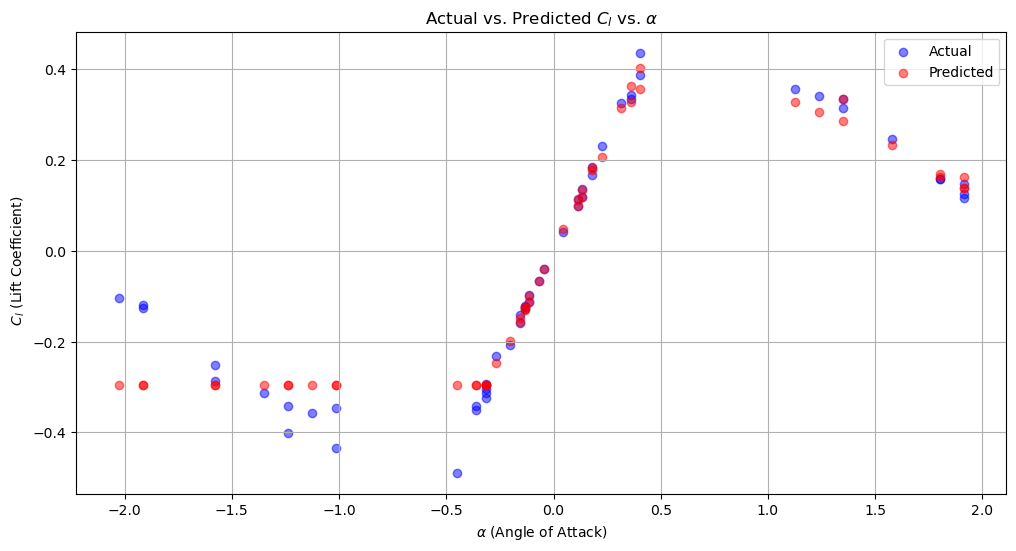

In [1022]:
plt.figure(figsize=(12, 6)) 
plt.scatter(X_test[:,1], y_test, color='blue', label='Actual', alpha=0.5) 
plt.scatter(X_test[:,1], y_pred, color='red', label='Predicted', alpha=0.5) 
#plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5) 
#plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5) 
plt.title('Actual vs. Predicted $C_l$ vs. $\\alpha$') 
plt.xlabel('$\\alpha$ (Angle of Attack)') 
plt.ylabel(' $C_l$ (Lift Coefficient)')
plt.legend() 
plt.grid(True)
plt.show()

In [957]:
y_train_pred = regr.predict(X_train)
print(y_train_pred.shape)

(206,)


ValueError: x and y must be the same size

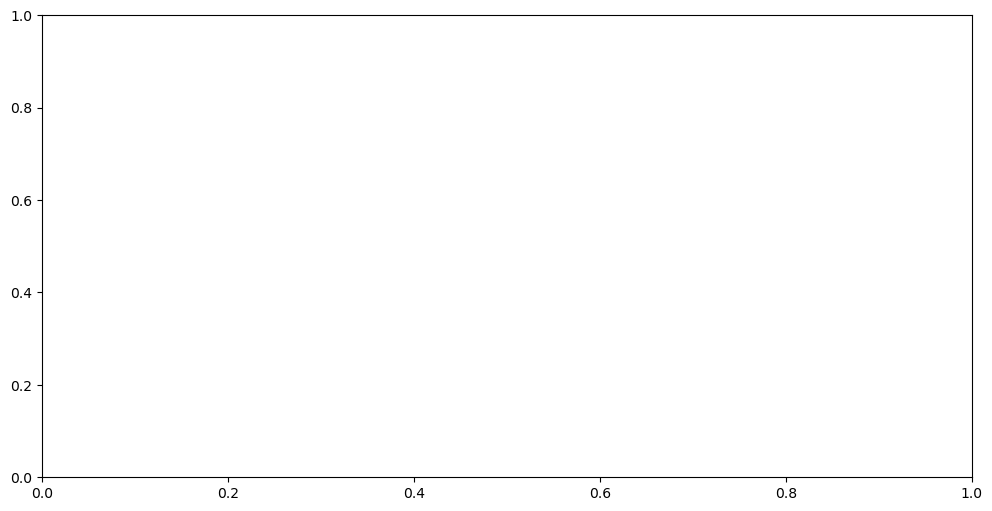

In [958]:
plt.figure(figsize=(12, 6))
#plt.scatter(X_train[:, 1], y_train, color='blue', label='Actual', alpha=0.5)
#plt.scatter(X_train[:, 1], y_train_pred, color='red', label='Predicted', alpha=0.5)
plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted $C_l$ vs. $\\alpha$')
plt.xlabel('$\\alpha$ (Angle of Attack)')
plt.ylabel('$C_l$ (Lift Coefficient)')
plt.legend()
plt.grid(True)
plt.show()
